In [77]:
#%matplotlib notebook
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

from scipy.stats import norm
from scipy.stats import t
from scipy.stats import chi2

import os
import os.path as path
import wget

In [78]:
if not path.exists('Data'):
    os.mkdir('Data')
    
!rm Data/*

file = 'Data/Minimos.dat'
url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/MinimosLineal.txt'
#url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/MinimosCuadratico.txt'

if not path.exists(file):
    Path_ = wget.download(url,file)
    print('File loaded')
else:
    Path_ = file

100% [..................................................................................] 522 / 522File loaded


In [79]:
data = np.loadtxt(Path_)
x = data[:,0]
y = data[:,1]

In [81]:
# Agregamos ruido
N = len(x)
sigma = np.random.uniform(0,5.,size=N)
sigma

array([2.21684182, 0.15091823, 3.73438541, 1.65661331, 4.27130878,
       0.62061877, 1.97549782, 1.62687389, 2.35121669, 2.72218222,
       4.98779491, 0.93851999, 1.30860347, 2.26614642, 4.14993475,
       4.23739029, 1.36202321, 3.78643881, 2.45628415, 1.05590843])

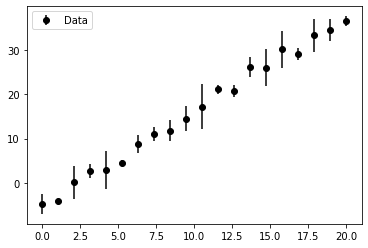

In [82]:
#plt.scatter(x,y)
plt.errorbar(x,y,yerr=sigma,fmt='o',color='k',label='Data')
plt.legend(loc=0)

In [83]:
def GetFit(x,y,n=1):
    
    l = x.shape[0]
    b = y
    
    A = np.ones((l,n+1))
    
    for i in range(1,n+1):
        A[:,i] = x**i
        
    AT = np.dot(A.T,A)
    bT = np.dot(A.T,b)

    xsol = np.linalg.solve(AT,bT)
    
    return xsol

In [84]:
# Grado polinomial
n = 1
param = GetFit(x,y,n)
param

array([-5.12918553,  2.12503681])

In [85]:
def GetModel(x,p):
    
    y = 0.
    for i in range(len(p)):
        y += p[i]*x**i
        
    return y

In [86]:
X = sym.Symbol('x',real=True)
#GetModel(X,param)

In [87]:
_x = np.linspace(np.min(x),np.max(x),50)
_y = GetModel(_x,param)

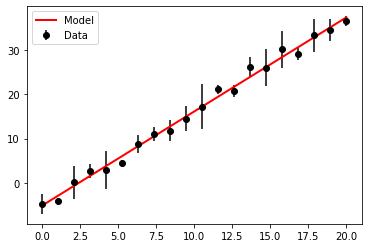

In [88]:
plt.errorbar(x,y,yerr=sigma,fmt='o',color='k',label='Data')
plt.plot(_x,_y,color='r',lw=2,label='Model')
plt.legend()

In [89]:
def GetError(x,y,p):
    
    l = x.shape[0]
    
    A = np.ones((l,n+1))
    
    for i in range(1,n+1):
        A[:,i] = x**i
        
    # Residuos
    R = y - np.dot(A,p)
    
    sigma2 = np.dot(R.T,R)/(len(y)-len(p))
    
    Cov = sigma2*np.linalg.inv(np.dot(A.T,A))
    
    #print(sigma2)
    
    return Cov,sigma2

In [90]:
Cov,_ = GetError(x,y,param)
Cov

array([[ 0.23596625, -0.01724369],
       [-0.01724369,  0.00172437]])

16.121183719999998 2.9692675372531707 5.429346974544937 2.10092204024096
2.1250368080082755 0.04152551726875023 51.174240509881834 2.1098155778331806
-0.005124248749378878 0.007802022641454136 0.6567846550652696 2.1199052992210112
-0.001847824135545579 0.0014521692313529421 1.2724578483349474 2.131449545559323
-8.887426753635508e-05 0.0002876420469061855 0.30897522977696457 2.1447866879169273
4.2497580093721556e-05 5.70121874370399e-05 0.7454122005168243 2.1603686564610127
3.584816529637492e-06 1.170085317878469e-05 0.3063722341322318 2.1788128296634177
-1.1251320447803005e-06 2.442369041046477e-06 0.4606724151310964 2.200985160082949
1.2630640976816465e-07 5.264242198728005e-07 0.23993274815259066 2.2281388519649385
-1.2387160547108246e-07 1.1054000163393915e-07 1.120604339063535 2.2621571627409915


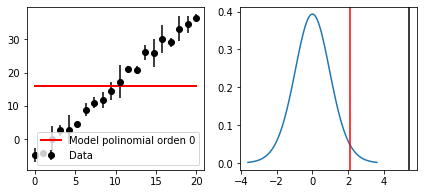

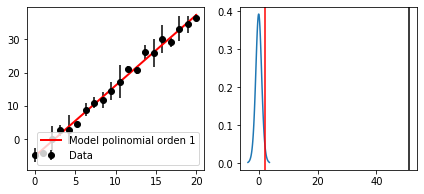

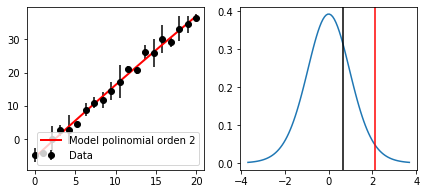

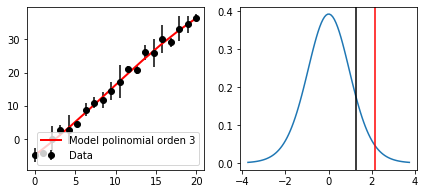

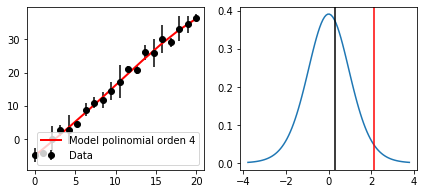

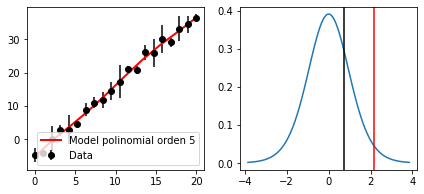

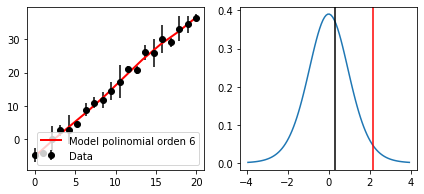

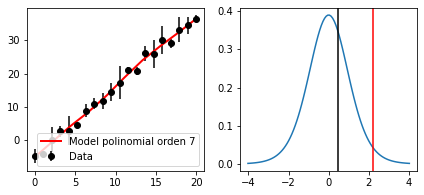

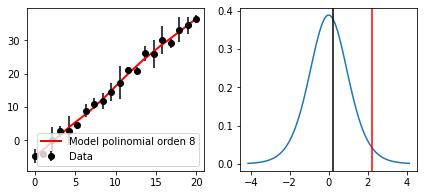

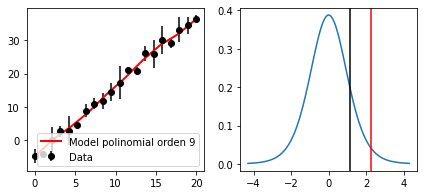

In [93]:
for n in range(10):
    
    param = GetFit(x,y,n)
    Cov,_ = GetError(x,y,param)
    
    _x = np.linspace(np.min(x),np.max(x),10)
    _y = GetModel(_x,param)
    
    ai = param[-1]
    sigmaai = np.sqrt(Cov[-1,-1])
    
    tobs = np.abs(0. - ai)/sigmaai
    
    df = N - len(param) - 1
    #print(df)
    
    tcritico = t.ppf(0.975,df=df)
    tcritico

    print(ai,sigmaai,tobs,tcritico)
    
    fig = plt.figure(figsize=(7,3))
    ax = fig.add_subplot(121)
    ax1 = fig.add_subplot(122)
    
    ax.errorbar(x,y,yerr=sigma,fmt='o',color='k',label='Data')
    ax.plot(_x,_y,color='r',lw=2,label='Model polinomial orden {}'.format(n))
    ax.legend()
    
    _t = np.linspace(t.ppf(0.001,df=df),t.ppf(0.999,df=df),100)
    ax1.plot(_t,t.pdf(_t,df=df))
    ax1.axvline(x=tobs,color='k')
    ax1.axvline(x=tcritico,color='r')
    
    #print(param,Cov)